In [1]:
import scipy.io
import utils
import visualize as vis
import numpy as np
import TWIST

Load data

In [9]:
data_path = '../data/NC_m6_np2_df0.5_32x32x11.mat'

m = 6 # no of patterns
nump = 2 # no of detected planes
df = 0.5 # downsampling factor
nx = 32 # width of a plane (dy = 1/3 um)
ny = 32 # height of a plane (dx = 1/3 um)
nz = 11 # number of planes (dz = 2 um)

data = scipy.io.loadmat(data_path)

FM = data['A']
X = data['X_original'].T
y_clean = data['Y'].T
y_noisy = data['Yn'].T

Visualize measurement matrix A

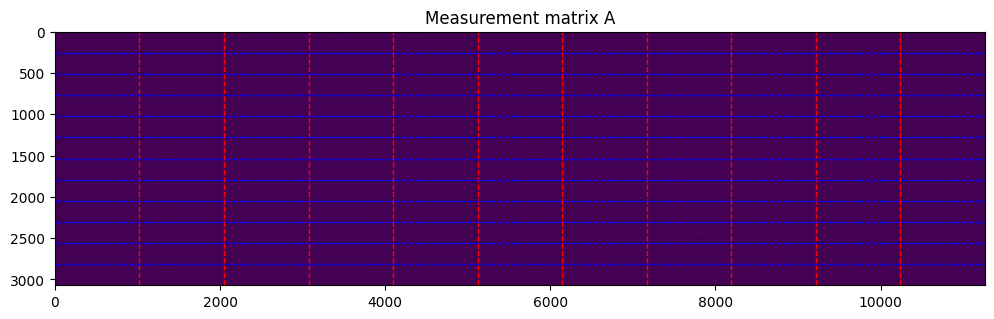

In [10]:
vis.visualize_A(FM, nx, ny, nz, nump, m, df, figsize=(12, 12))

Visualize object X

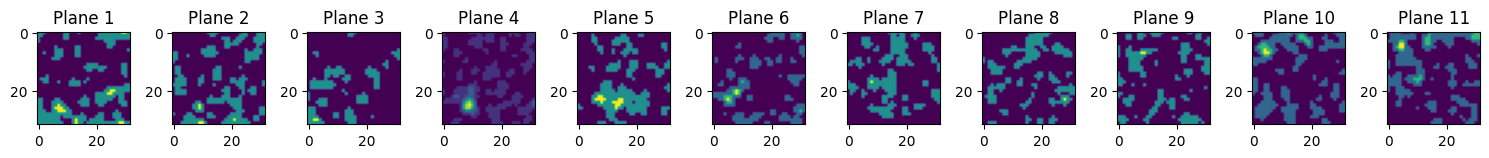

In [11]:
vis.visualize_X(X, nx, ny, nz, figsize=(15, 15), planes_to_plot=range(nz))

Visualize measurement y

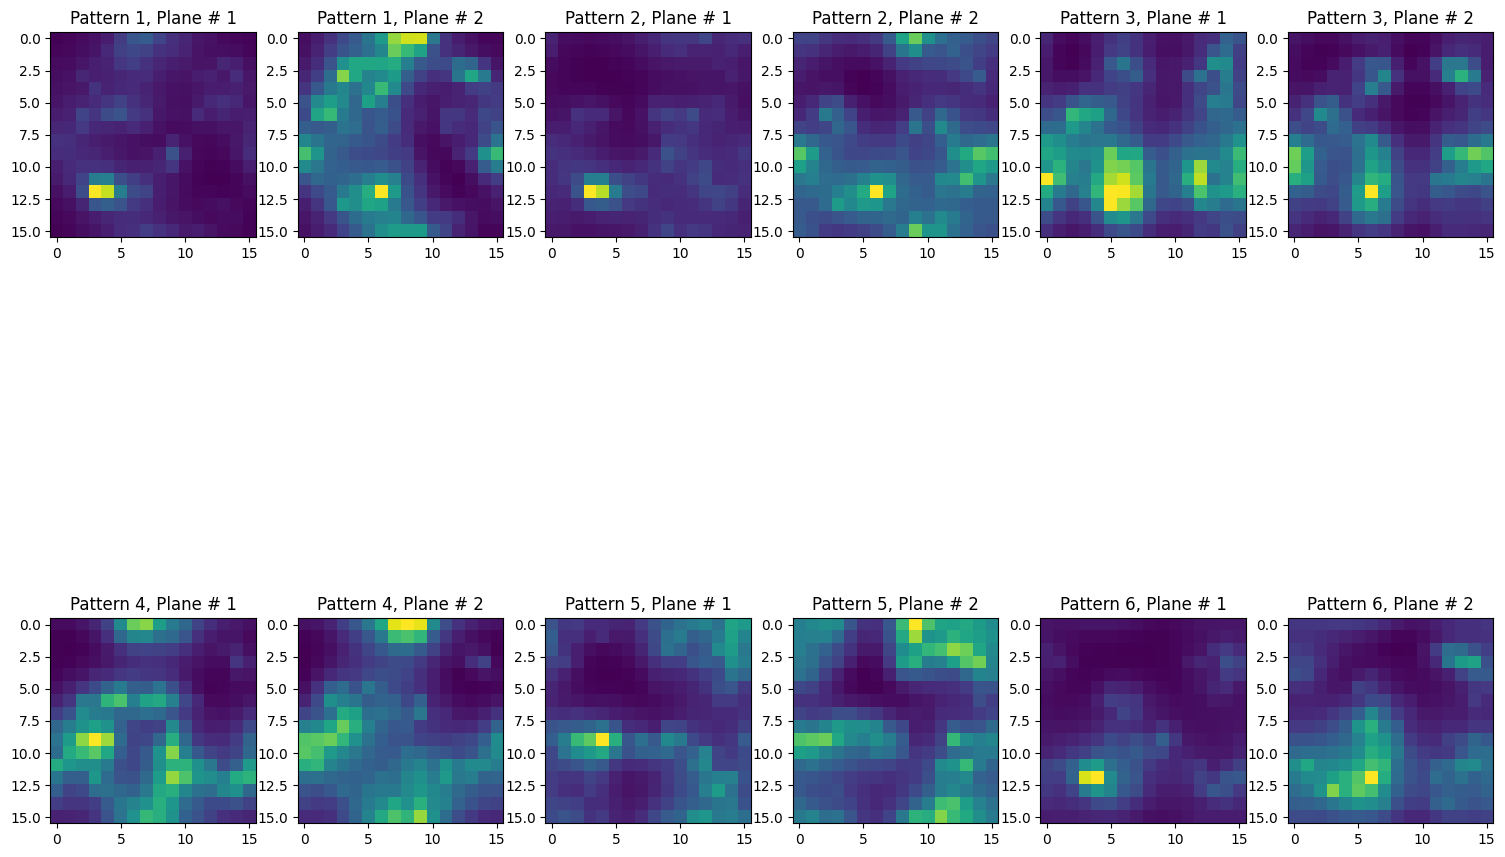

In [12]:
# clean measurements
vis.visualize_y(y_clean, nx, ny, df, m, nump, figsize=(15, 15))

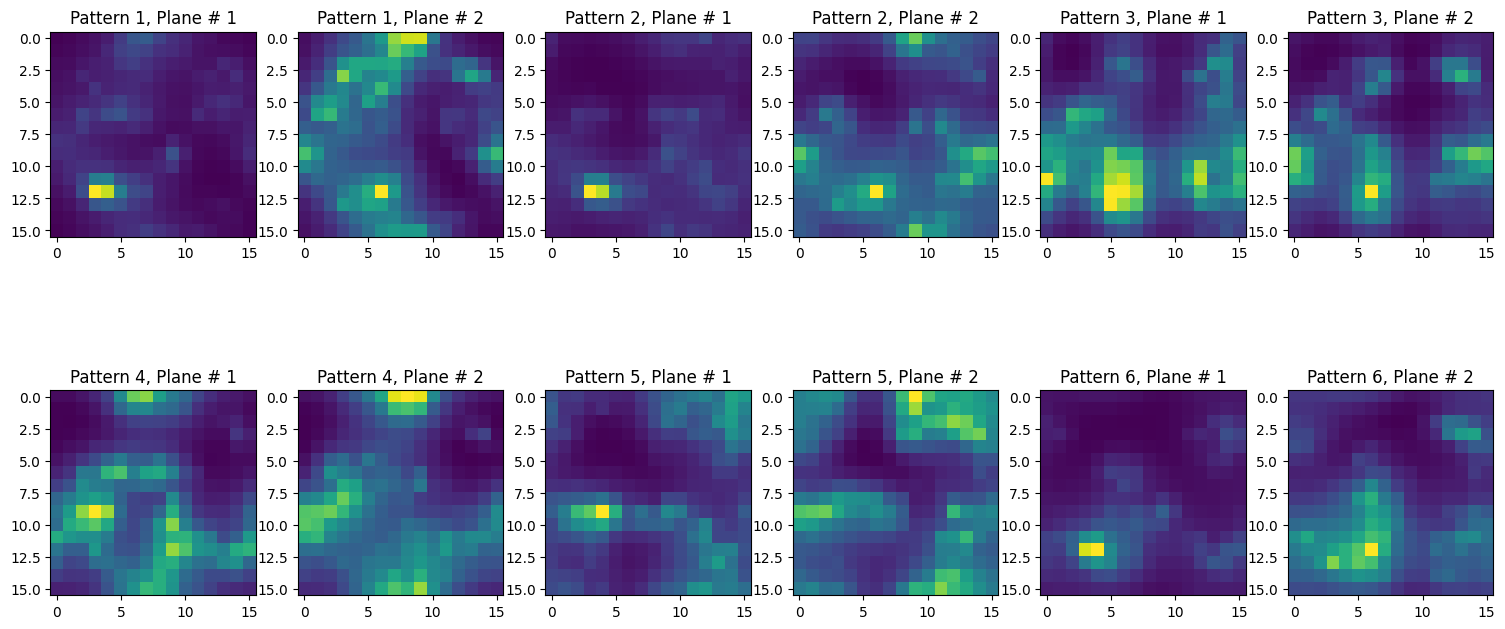

In [13]:
# noisy measurements
vis.visualize_y(y_noisy, nx, ny, df, m, nump, figsize=(15, 8))

Run twist

In [14]:
y = y_noisy # observed data

absAty = np.abs(utils.AT(y, FM, nx, ny, nz))
tau = 1e-2*np.max(absAty) # Regularization parameter
lam1 = 1e-4 # Regularization parameter
tolA = 1e-5 # Stopping threshold

x_twist, dummy, obj_twist, times_twist, dummy, mse_twist, dummy = TWIST.TwIST(y, FM, tau, nx, ny, nz,
                                                                  LAMBDA=lam1, TRUE_X=X, MONOTONE=1, INITIALIZATION=0,
                                                                  STOPCRITERION=1, TOLERANCEA=0.01, VERBOSE=0)

Visualize results

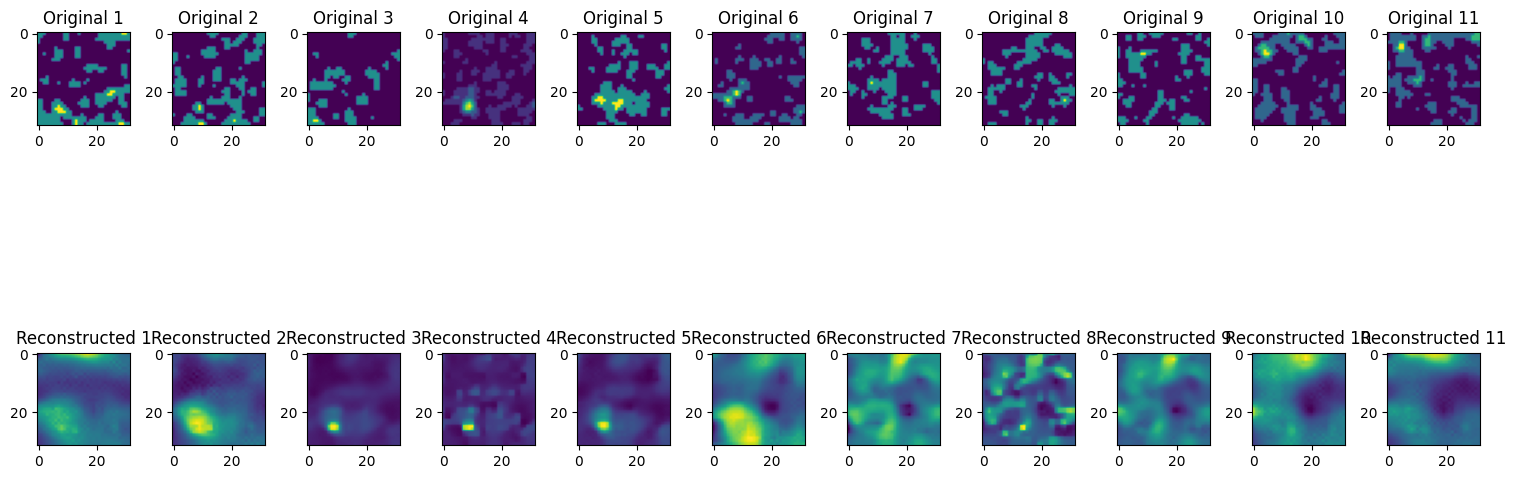

In [15]:
vis.comparison_twist(X, x_twist, nx, ny, nz, figsize=(15, 8))

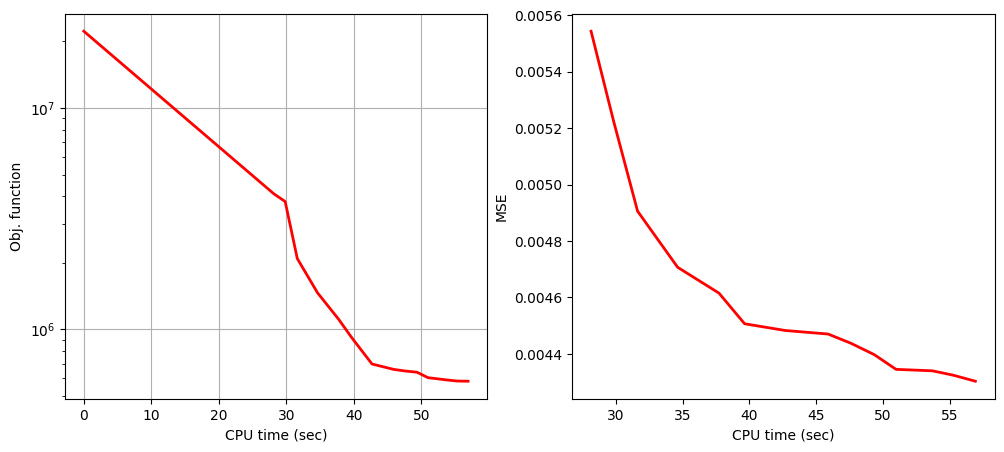

TwIST CPU time: 56.921875
MSE Loss: 4.3029e-03


In [16]:
vis.obj_mse_twist(obj_twist, times_twist, mse_twist, figsize=(12, 5))